# Preparation
*   DO NOT edit the cells in this section.
*   **!!! NOT REQUIRED to read or understand Python code the cell below!!!**
*   JUST READ and SEE the results (output text and picture)


# 1. Introduction

The figure presented above shows the executation time of some methods in XArrayList, see the legend.
* The horizontal axis corresponds to number of items (noted as **size** or **n**)  of the lists in the experiment; from the figure, **n** varies from 1 to one milion (10^6).
* The vertical axis is the executation time. 

We can make some conclusions as follows from the figure:
* **add(0,*)** and **removeAt(0)** are costly compared to the others; look for red diamons and mangenta triagles in the figure.
* **get(k)**, **add(*)**, **removeAt(n-1)** are really cheap, does not depend on the data size.

The figure is plotted using the data given in the **alisttime.csv** (downloaded from GDrive).**alisttime.csv** is a **CSV** file (text file). Its structure is given the above cell.
* **alisttime.csv** contains 8 collums with headers: **size**, **addfirst(ms)**, etc (see the above cell).
* the meaning of columns, exemplified for the first row:
    * size = 537993: the list in the experiment contains 537993 elements
    * addfirst(ms) = 0.001508: when the list containing 537993 elements, if we add **one more item** at index **0** then this operation completed within 0.001508 miliseconds.
    * removerandpos(ms) = 0.000714: when the list containing 537993 elements, if we remove **one item** at index **k** from the list then this operation completed within 0.000714 miliseconds.
      * **k** is a random index within range [0, **size-1**]
      * Actually, in order to determine the exec time of **removerandpos** we need to generate **k** **ntries** times; for examples, if **ntries =10**, we try with 10 random values of **k**.

The objective of this exercise is to develop a tool called **listimeit**. That tool will generate **CSV** file as given above.

# 2. How to timeit for list's operations
* **listimeit** must do **timeit** for lists having different sizes. The size of the list is the horizontal axis of the figure. 
  * The maximum length of lists in the figure is one milion; however, **listimeit** needs not to dertermine the executation time for every size from 1 to one milion.
  * **listitimeit** samples the size by uniform distribution within [1, **max_length**]; for example, if **max_length** is **10^6** then **size** is any random value within [1, **10^6**]
      * one sample (one value of **size**) generates one row in **CSV** file.
      * the total number of rows in **CSV** file can be controlled by a value **nsizes**
      * **max_length** and **nsizes** can be passed as command line arguments for **listimeit**, as follows
      > ./listtimeit -a filename.csv -nsizes 100 -max_length 1000000
      * With the command above:
        * **nsizes = 10**
        * **max_length=10^6**
        * **CSV** file is filename.csv
        * **-a** means: do **timeit** for X**A**rrayList
        * meanwhile, **-s** for **S**LinkedList and **-d** for **D**LinkedList

  * **for each size** in **nsizes**, listimeit has to determine executation time for the afore-mentioned methods: add, remove, get.
    * to obtain reliable estimation for times, **listtimeit** has to run each methods **nexec** times and take the averaged value for **nexec** tries. **nexec** can be also controlled via command line arguments, as follows:
    > ./listtimeit -a filename.csv -nsizes 100 -max_length 1000000 -nexec 20
    * The above command: **nexec=20** means that **listimeit** run each method 20 times and compute the averaged execution time.

Moreover, methods like **add(k,*)**, **removeAt(k)** and **get(k)**; where, **k** is a valid index, within [0, **size**]. **listtimeit** SHOUD NOT fix **k** to a static value. It SHOULD do sampling to get **k**. That means **k** is sampled from a uniform distribution [0, **size**].
  * How many values of **k** should be sampled can be controlled by a value named **ntries**, via command line, for examples.
    > ./listtimeit -a filename.csv -nsizes 100 -max_length 1000000 -nexec 20 -ntries 10
    * **listtimeit** will executes each method **add(k,*)**, **removeAt(k)** and **get(k)** [**nexec** x **ntries**] and return the averaged time. Within the command here, [**nexec** x **ntries**] = 20x10 = 200 tries.

# 3. Guidelines:
* [Samples for measuring executation time](https://en.cppreference.com/w/cpp/chrono/high_resolution_clock/now)
* Samping integers from a **uniform distribution**: use **genIntArray** in **util/ArrayLib.h** of **DSACPP**
```
int* genIntArray(int size, int minValue=0, int maxValue=100, 
               bool manualSeed=false, int seedValue=0)
```
For example: generate a random with uniform [1, 10000]
```
int* ptr = genIntArray(50, 1, 10000);
//use ptr here
//delete: when compelete
delete []ptr;
```




# 4. Coding
Fill your code in the following cell


In [1]:
##################################################################################
# DO NOT edit this cell
# MUST RUN this cell to download and prepare dsaframe for students
##################################################################################


!rm -f -r ./dsastudents
!gdown --id 1eFydXIiS8f_JCFXzAoLnIFo-fLH6UT2J
!unzip ./dsastudents.zip
%cd dsastudents

Downloading...
From: https://drive.google.com/uc?id=1eFydXIiS8f_JCFXzAoLnIFo-fLH6UT2J
To: /content/dsastudents.zip
100% 1.51M/1.51M [00:00<00:00, 117MB/s]
Archive:  ./dsastudents.zip
   creating: dsastudents/
  inflating: dsastudents/.dep.inc    
   creating: dsastudents/.vscode/
  inflating: dsastudents/.vscode/tasks.json  
  inflating: dsastudents/Makefile    
   creating: dsastudents/build/
   creating: dsastudents/build/Debug/
   creating: dsastudents/build/Debug/GNU-Linux/
   creating: dsastudents/build/Debug/GNU-Linux/dsacpp/
  inflating: dsastudents/build/Debug/GNU-Linux/dsacpp/dsa_main_test.o  
  inflating: dsastudents/build/Debug/GNU-Linux/dsacpp/dsa_main_test.o.d  
   creating: dsastudents/build/Debug/GNU-Linux/dsacpp/src/
   creating: dsastudents/build/Debug/GNU-Linux/dsacpp/src/geom/
  inflating: dsastudents/build/Debug/GNU-Linux/dsacpp/src/geom/Point3D.o  
  inflating: dsastudents/build/Debug/GNU-Linux/dsacpp/src/geom/Point3D.o.d  
  inflating: dsastudents/build/Debug/GNU-

In [4]:
%%writefile listtimeit.cpp

#include <iostream>
#include <fstream>
#include <chrono>
using namespace std;
using namespace std::chrono;

#include "geom/Vector3D.h"
#include "geom/Point3D.h"
#include "list/XArrayList.h"
#include "list/SLinkedList.h"
#include "list/DLinkedList.h"
#include "list/IList.h"
#include "tree/AVL.h"
#include "tree/BST.h"
#include "tree/IBST.h"
#include "util/ArrayLib.h"
#include <algorithm>
Vector3D* genvectors(int size,float minValue, float maxValue, bool manualSeed = false, int seedValue =0){
    Vector3D* head = new Vector3D[size];

    std::default_random_engine* engine;
    if (manualSeed) 
        engine = new std :: default_random_engine(static_cast<long unsigned int>(seedValue));
    else
        engine = new std:: default_random_engine(static_cast<long unsigned int>(time(0)));

    uniform_real_distribution<double> dist(minValue, maxValue);

    for (int i = 0; i < size; i++){
        float x = dist(*engine);
        float y = dist(*engine);
        float z = dist(*engine);
        head[i] = Vector3D(x,y,z);
    }
    delete engine;
    return head;
}
double list_addInt(IList<int>* plist,int size, int nexec, int ntries=10){
    plist->clear();
    for(int idx = 0; idx < size; idx++){
           plist->add(idx);
    }
    
    int* k = genIntArray(ntries, 0, size-1);
    double total = 0;
    for(int idx = 0; idx < ntries; idx++){
        for(int i=0; i<nexec;i++){
            auto start = high_resolution_clock::now();
            plist->add(k[idx],k[idx]);
            auto end = high_resolution_clock::now();
            duration<double> diff = duration_cast<microseconds> (end - start);
            total += diff.count();
            //remove to makesure that list always size elements, to calculate the same size list in nexec
            plist->removeAt(size);
        }
    }
    delete []k;
    plist->clear();
    return total/(nexec*ntries);
}

double list_addVec(IList<Vector3D*>* pList, int size, int nexec, int ntries = 10){
    pList -> clear();
    Vector3D* ptr = genvectors(size,-size,size);
    for (int i = 0; i < size; i++) pList->add(new Vector3D(ptr[i]));

    int* randptr = genIntArray(ntries,0,size-1);
    double total = 0;
    Vector3D* ptrVec = genvectors(ntries, -size, size - 1);
    for (int i = 0; i < ntries; i++){
        for (int j = 0; j < nexec; j++){
            auto start = high_resolution_clock::now();
            pList->add(randptr[i], new Vector3D(ptrVec[i]));
            auto stop = high_resolution_clock::now();
            duration<double> time_span = duration_cast<microseconds> (stop - start);
            total += time_span.count();
            
            pList->removeAt(size);
        }
    }
    delete []randptr;
    pList->clear();
    return total/(nexec*ntries);
}

double list_search(IList<int>* pList, int size, int nexec, int ntries = 10){
    pList -> clear();
    for (int i = 0; i < size; i++) pList->add(i);
    double total = 0;
    int *ptr = genIntArray(ntries,0, size-1);
    for (int j = 0; j < nexec; j++){
            auto start = high_resolution_clock::now();
            pList->search(ptr[j]);
            auto stop = high_resolution_clock::now();
            duration<double> time_span = duration_cast<microseconds> (stop - start);
            total += time_span.count();
        }
    pList->clear();
    return total/(nexec);
}

double AVL_addInt(AVL<int,int*>* pTree, int size, int nexec, int ntries){
    pTree->clear();
    for (int i = 0; i < size; i++) pTree->add(i);

    double total =0;
    int *ptr = genIntArray(ntries, 0 ,size -1);
    for (int i = 0; i < ntries; i++){
        for (int j = 0; j < nexec; j++){
        auto start = high_resolution_clock :: now();
        pTree->add(ptr[i], new int[ptr[i]]);
        auto stop = high_resolution_clock :: now();
        duration<double> time_span = duration_cast<microseconds> (stop - start);

        total += time_span.count();
        pTree->remove(ptr[i]);
        }
    }
    delete []ptr;
    pTree->clear();
    return total/(nexec * ntries);
}

double AVL_addVec(AVL<Vector3D,Vector3D*>* pTree, int size, int nexec, int ntries){
    pTree->clear();
    Vector3D* ptr = genvectors(size,0,size);
    for (int i = 0; i < size; i++) pTree->add(ptr[i],new Vector3D(ptr[i]));

    double total =0;
    Vector3D* ptrVec = genvectors(ntries,0 , size);
    for (int i = 0; i < ntries; i++){
        for (int j = 0; j < nexec; j++){
        auto start = high_resolution_clock :: now();
        pTree->add(ptrVec[i],new Vector3D(ptrVec[i]));
        auto stop = high_resolution_clock :: now();
        duration<double> time_span = duration_cast<microseconds> (stop - start);

        total += time_span.count();
        pTree->remove(ptr[i]);
        }
    }
    delete []ptr;
    delete []ptrVec;
    pTree->clear();
    return total/(nexec * ntries);
}
double AVL_search(AVL<int,int*>* pTree, int size, int nexec, int ntries){
    pTree->clear();
    for (int i = 0; i < size;i++) pTree->add(i);

    double total =0;
    int* ptr = genIntArray(nexec, 0, size-1);
    for (int j = 0; j < nexec; j++){
        bool success;
        auto start = high_resolution_clock :: now();
        pTree -> search(ptr[j],success);
        auto stop = high_resolution_clock :: now();
        duration<double> time_span = duration_cast<microseconds> (stop - start);

        total += time_span.count();
        }
    delete []ptr;
    pTree->clear();
    return total/(nexec);
}

double BST_addInt(BST<int,int*>* pTree, int size, int nexec, int ntries){
    pTree -> clear();
    for (int i = 0; i < size; i++) pTree->add(i);
    double total = 0;
    int* ptr = genIntArray(ntries,0,size-1);
    for (int i = 0; i < ntries; i++){
        for (int j = 0; j < ntries; j++){
            auto start = high_resolution_clock :: now();
            pTree -> add (ptr[i],new int[ptr[i]]);
            auto stop = high_resolution_clock :: now();
            duration<double> time_span = duration_cast<microseconds> (stop - start);
            total += time_span.count();

            pTree -> remove(ptr[i]);
        }
    }
    delete []ptr;
    pTree->clear();
    return total/(nexec*ntries);
}

double BST_addVec(BST<Vector3D,Vector3D*>* pTree, int size, int nexec, int ntries){
    pTree->clear();
    Vector3D* ptr = genvectors(size,0,size);
    for (int i = 0; i < size; i++) pTree->add(ptr[i],new Vector3D(ptr[i]));

    double total =0;
    Vector3D* ptrVec = genvectors(ntries,0 , size);
    for (int i = 0; i < ntries; i++){
        for (int j = 0; j < nexec; j++){
        auto start = high_resolution_clock :: now();
        pTree->add(ptrVec[i],new Vector3D(ptrVec[i]));
        auto stop = high_resolution_clock :: now();
        duration<double> time_span = duration_cast<microseconds> (stop - start);

        total += time_span.count();
        pTree->remove(ptr[i]);
        }
    }
    delete []ptr;
    delete []ptrVec;
    pTree->clear();
    return total/(nexec * ntries);
}
double BST_search(BST<int,int*>* pTree, int size, int nexec, int ntries){
    pTree->clear();
    for (int i = 0; i < size;i++) pTree-> add(i);

    double total =0;
    int* ptr = genIntArray(nexec, 0, size-1);
    for (int j = 0; j < nexec; j++){
        bool success;
        auto start = high_resolution_clock :: now();
        pTree -> search(ptr[j],success);
        auto stop = high_resolution_clock :: now();
        duration<double> time_span = duration_cast<microseconds> (stop - start);

        total += time_span.count();
        }
    delete []ptr;
    pTree->clear();
    return total/(nexec);
}
/*
NOTE:
  * SHOULD define other functions to support the implementation of "meter"
  * Parameters: read the explanation presented above
*/
void meter_addInt(DLinkedList<int>* pD, SLinkedList<int>* pS, XArrayList<int>* pX, BST<int,int*>* pBST, AVL<int,int*>* pAVL,
               string csvfile, int* ptr_size, int nsizes, int nexec=10, int ntries=10){
     //YOUR CODE HERE
    std::ofstream csvstream;
    csvstream.open (csvfile, std::ofstream::out | std::ofstream::app);
    csvstream << "n" << "," << "DLinkedList(ms)" << "," <<"SLinkedList(ms)" << "," << "XArrayList(ms)" << ","<< "BST(ms)" << "," << "AVL(ms)" << endl;
    cout    <<"n"<<"\t ->"
            << fixed<<setw(18) << setprecision(8) << "DLinkedList(ms)" << ", "
            << fixed<<setw(18) << setprecision(8) << "SLinkedList(ms)" << ", "
             << fixed<<setw(18) << setprecision(8) << "XArrayList(ms)" << ","
            << fixed<<setw(18) << setprecision(8) << "BST(ms)" << ", "
            << fixed<<setw(18) << setprecision(8) << "AVL(ms)" << ", " << endl;
            
    for(int i=0; i<nsizes; i++){
        pD->clear();
        pS->clear();
        pX->clear();
        pBST->clear();
        pAVL->clear();
        double DLL = list_addInt(pD, ptr_size[i], nexec, ntries);
        double SLL = list_addInt(pS, ptr_size[i], nexec, ntries);
        double XArr = list_addInt(pX, ptr_size[i], nexec, ntries);
        double BST = BST_addInt(pBST, ptr_size[i], nexec, ntries);
        double AVL = AVL_addInt(pAVL, ptr_size[i], nexec, ntries);
        if(i%10 == 0)
            cout    <<ptr_size[i]<<"\t ->"
                    << fixed<<setw(18) << setprecision(8) << DLL << ", "
                    << fixed<<setw(18) << setprecision(8) << SLL << ", "
                    << fixed<<setw(18) << setprecision(8) << XArr << ", "
                    << fixed<<setw(18) << setprecision(8) << BST << ", "
                    << fixed<<setw(18) << setprecision(8) << AVL << endl;

        csvstream   << ptr_size[i] <<", "
                    << fixed<<setw(18) << setprecision(8) << DLL << ", "
                    << fixed<<setw(18) << setprecision(8) << SLL << ", "
                    << fixed<<setw(18) << setprecision(8) << XArr << ", "
                    << fixed<<setw(18) << setprecision(8) << BST << ", "
                    << fixed<<setw(18) << setprecision(8) << AVL << endl;
    }
    cout << "Done" << endl;
    
    csvstream.close();
}
void meter_addVector3D(DLinkedList<Vector3D*>* pD,SLinkedList<Vector3D*>* pS,XArrayList<Vector3D*>* pX, BST<Vector3D,Vector3D*>* pBST, AVL<Vector3D,Vector3D*>* pAVL,
           string csvfile, int* ptr_size, int nsizes, int nexec=10, int ntries=10){
     std::ofstream csvstream;
    csvstream.open (csvfile, std::ofstream::out | std::ofstream::app);
    csvstream << "n" << "," << "DLinkedList(ms)" << "," <<"SLinkedList(ms)" << "," << "XArrayList(ms)" << ","<< "BST(ms)" << "," << "AVL(ms)" << endl;
    cout    <<"n"<<"\t ->"
            << fixed<<setw(18) << setprecision(8) << "DLinkedList(ms)" << ", "
            << fixed<<setw(18) << setprecision(8) << "SLinkedList(ms)" << ", "
             << fixed<<setw(18) << setprecision(8) << "XArrayList(ms)" << ","
            << fixed<<setw(18) << setprecision(8) << "BST(ms)" << ", "
            << fixed<<setw(18) << setprecision(8) << "AVL(ms)" << ", " << endl;
            
    for(int i=0; i<nsizes; i++){
        pD->clear();
        pS->clear();
        pX->clear();
        pBST->clear();
        pAVL->clear();
        double DLL = list_addVec(pD, ptr_size[i], nexec, ntries);
        double SLL = list_addVec(pS, ptr_size[i], nexec, ntries);
        double XArr = list_addVec(pX, ptr_size[i], nexec, ntries);
        double BST = BST_addVec(pBST, ptr_size[i], nexec, ntries);
        double AVL = AVL_addVec(pAVL, ptr_size[i], nexec, ntries);
        if(i%10 == 0)
            cout    <<ptr_size[i]<<"\t ->"
                    << fixed<<setw(18) << setprecision(8) << DLL << ", "
                    << fixed<<setw(18) << setprecision(8) << SLL << ", "
                    << fixed<<setw(18) << setprecision(8) << XArr << ", "
                    << fixed<<setw(18) << setprecision(8) << BST << ", "
                    << fixed<<setw(18) << setprecision(8) << AVL << endl;

        csvstream   << ptr_size[i] <<", "
                    << fixed<<setw(18) << setprecision(8) << DLL << ", "
                    << fixed<<setw(18) << setprecision(8) << SLL << ", "
                    << fixed<<setw(18) << setprecision(8) << XArr << ", "
                    << fixed<<setw(18) << setprecision(8) << BST << ", "
                    << fixed<<setw(18) << setprecision(8) << AVL << endl;
    }
    cout << "Done" << endl;
    
    csvstream.close(); 
}
void meter_serach(DLinkedList<int>* pD, SLinkedList<int>* pS, XArrayList<int>* pX, BST<int,int*>* pBST, AVL<int,int*>* pAVL,
               string csvfile, int* ptr_size, int nsizes, int nexec=10, int ntries=10){
     //YOUR CODE HERE
    std::ofstream csvstream;
    csvstream.open (csvfile, std::ofstream::out | std::ofstream::app);
    csvstream << "n" << "," << "DLinkedList(ms)" << "," <<"SLinkedList(ms)" << "," << "XArrayList(ms)" << ","<< "BST(ms)" << "," << "AVL(ms)" << endl;
    cout    <<"n"<<"\t ->"
            << fixed<<setw(18) << setprecision(8) << "DLinkedList(ms)" << ", "
            << fixed<<setw(18) << setprecision(8) << "SLinkedList(ms)" << ", "
             << fixed<<setw(18) << setprecision(8) << "XArrayList(ms)" << ","
            << fixed<<setw(18) << setprecision(8) << "BST(ms)" << ", "
            << fixed<<setw(18) << setprecision(8) << "AVL(ms)" << ", " << endl;
            
    for(int i=0; i<nsizes; i++){
        pD->clear();
        pS->clear();
        pX->clear();
        pBST->clear();
        pAVL->clear();
        double DLL = list_search(pD, ptr_size[i], nexec, ntries);
        double SLL = list_search(pS, ptr_size[i], nexec, ntries);
        double XArr = list_search(pX, ptr_size[i], nexec, ntries);
        double BST = BST_search(pBST, ptr_size[i], nexec, ntries);
        double AVL = AVL_search(pAVL, ptr_size[i], nexec, ntries);
        if(i%10 == 0)
            cout    <<ptr_size[i]<<"\t ->"
                    << fixed<<setw(18) << setprecision(8) << DLL << ", "
                    << fixed<<setw(18) << setprecision(8) << SLL << ", "
                    << fixed<<setw(18) << setprecision(8) << XArr << ", "
                    << fixed<<setw(18) << setprecision(8) << BST << ", "
                    << fixed<<setw(18) << setprecision(8) << AVL << endl;

        csvstream   << ptr_size[i] <<", "
                    << fixed<<setw(18) << setprecision(8) << DLL << ", "
                    << fixed<<setw(18) << setprecision(8) << SLL << ", "
                    << fixed<<setw(18) << setprecision(8) << XArr << ", "
                    << fixed<<setw(18) << setprecision(8) << BST << ", "
                    << fixed<<setw(18) << setprecision(8) << AVL << endl;
    }
    cout << "Done" << endl;
    
    csvstream.close();
}
/////////////////////////////////////////////////////////////////////////////
// YOUR ARE NOT REQUIRED TO CHANGE THE FOLLOWING FUNCTIONS
/////////////////////////////////////////////////////////////////////////////

int get_int(char** begin, char** end, const string& option, int _default){
    char** ptr = std::find(begin, end, option);
    if (ptr != end && ++ptr != end) return stoi(*ptr);
    else return _default;
}

string get_string(char** begin, char** end, const string& option, string _default){
    char** ptr = std::find(begin, end, option);
    if (ptr != end && ++ptr != end) return string(*ptr);
    else return _default;
}
bool option_exist(char** begin, char** end, const string& option){
    return std::find(begin, end, option) != end;
}

int main(int argc, char** argv){
    if(option_exist(argv, argv+argc, "-h")){
        cout << "Show help" << endl;
        return 0;
    }
    ///////////////////////////////////////////////////////////////////////////
    int nsizes, nexec, max_length, ntries;
    XArrayList<int> alist;
    SLinkedList<int> slist;
    DLinkedList<int> dlist;
    AVL<int,int*> pAVL;
    BST<int,int*> pBST;

    XArrayList<Vector3D*> alist2;
    SLinkedList<Vector3D*> slist2;
    DLinkedList<Vector3D*> dlist2;
    AVL<Vector3D,Vector3D*> pAVL2;
    BST<Vector3D,Vector3D*> pBST2;

    nsizes = get_int(argv, argv+argc, "-nsizes", 50);
    nexec = get_int(argv, argv+argc, "-nexec", 20);
    max_length = get_int(argv, argv+argc, "-max_length", 1000);
    ntries = get_int(argv, argv+argc, "-ntries", 10);
    int* ptr_sizes = genIntArray(nsizes, 1, max_length);
    
    //cout << nsizes << ", " << nexec << ", " << max_length << ", " << ntries << endl;
    if(option_exist(argv, argv+argc, "-ai")){
        cout << endl;
        cout << "Add (item: Int): Time measurement" << endl;
        cout << string(80, '-') << endl;
        string filename = get_string(argv, argv+argc, "-ai", "");
        meter_addInt(&dlist, &slist, &alist, &pBST, &pAVL , filename, ptr_sizes, nsizes, nexec, ntries);
    }

    if(option_exist(argv, argv+argc, "-av")){
        cout << endl;
        cout << "Add (item: vector3D): Time measurement" << endl;
        cout << string(80, '-') << endl;
        string filename = get_string(argv, argv+argc, "-av", "");
        meter_addVector3D(&dlist2, &slist2, &alist2, &pBST2, &pAVL2 , filename, ptr_sizes, nsizes, nexec, ntries);
    }

    if(option_exist(argv, argv+argc, "-s")){
        cout << endl;
        cout << "Search: Time measurement" << endl;
        cout << string(80, '-') << endl;
        string filename = get_string(argv, argv+argc, "-s", "");
        meter_serach(&dlist, &slist, &alist, &pBST, &pAVL , filename, ptr_sizes, nsizes, nexec, ntries);
    }
}


Overwriting listtimeit.cpp


In [9]:
%%shell

#//////////////////////////////////////////////////////////////////////////////
#// DO NOT EDIT THIS CELL
#//////////////////////////////////////////////////////////////////////////////

rm -f listtimeit
INCLUDE=./dsacpp/include
SOURCE=./dsacpp/src
g++ -std=c++11 listtimeit.cpp $SOURCE/geom/*.cpp -I $INCLUDE -o listtimeit
rm -f addInt.csv addVector3D.csv search.csv
./listtimeit -ai addInt.csv -nsizes 100 -ntries 10 -nexec 20 -max_length 10000
./listtimeit -av addVector3D.csv -nsizes 100 -ntries 10 -nexec 20 -max_length 10000
./listtimeit -s search.csv -nsizes 100 -ntries 10 -nexec 20 -max_length 10000


Add (item: Int): Time measurement
--------------------------------------------------------------------------------
n	 ->   DLinkedList(ms),    SLinkedList(ms),     XArrayList(ms),           BST(ms),            AVL(ms), 
7486	 ->        0.00000692,         0.00000684,         0.00001867,         0.00001117,         0.00000119
5704	 ->        0.00000559,         0.00000558,         0.00001198,         0.00000860,         0.00000122
4605	 ->        0.00000631,         0.00000639,         0.00000736,         0.00000920,         0.00000106
8916	 ->        0.00001437,         0.00001423,         0.00001127,         0.00002812,         0.00000118
2570	 ->        0.00000163,         0.00000158,         0.00000705,         0.00000269,         0.00000079
5314	 ->        0.00000612,         0.00000604,         0.00001063,         0.00001222,         0.00000096
9890	 ->        0.00001187,         0.00001203,         0.00001991,         0.00002922,         0.00000128
6014	 ->        0.00000843,   

# FIGURE

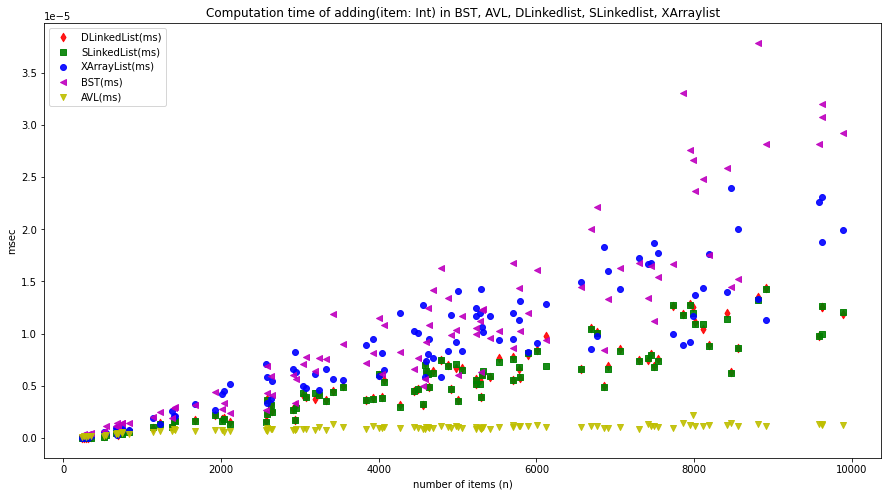

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

alisttime = pd.read_csv('addInt.csv')
#print(alisttime.iloc[0:3])

alisttime = alisttime.to_numpy()

fig = plt.figure(figsize=(15, 8))
plt.scatter(alisttime[:, 0],  alisttime[:,1], c='r', marker='d', alpha=0.9, label='DLinkedList(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,2], c='g', marker='s', alpha=0.9, label='SLinkedList(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,3], c='b', marker='o', alpha=0.9, label='XArrayList(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,4], c='m', marker='<', alpha=0.9, label='BST(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,5], c='y', marker='v', alpha=0.9, label='AVL(ms)')
plt.legend()
plt.title('Computation time of adding(item: Int) in BST, AVL, DLinkedlist, SLinkedlist, XArraylist')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
fig.savefig('Add_Int.jpeg')
plt.show()

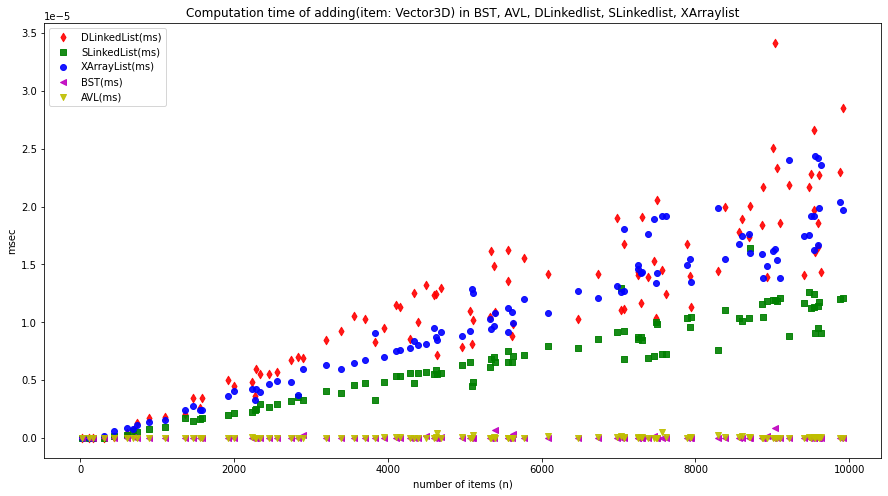

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

alisttime = pd.read_csv('addVector3D.csv')
#print(alisttime.iloc[0:3])

alisttime = alisttime.to_numpy()

fig = plt.figure(figsize=(15, 8))
plt.scatter(alisttime[:, 0],  alisttime[:,1], c='r', marker='d', alpha=0.9, label='DLinkedList(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,2], c='g', marker='s', alpha=0.9, label='SLinkedList(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,3], c='b', marker='o', alpha=0.9, label='XArrayList(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,4], c='m', marker='<', alpha=0.9, label='BST(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,5], c='y', marker='v', alpha=0.9, label='AVL(ms)')
plt.legend()
plt.title('Computation time of adding(item: Vector3D) in BST, AVL, DLinkedlist, SLinkedlist, XArraylist')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
fig.savefig('Add_Vector3D.jpeg')
plt.show()

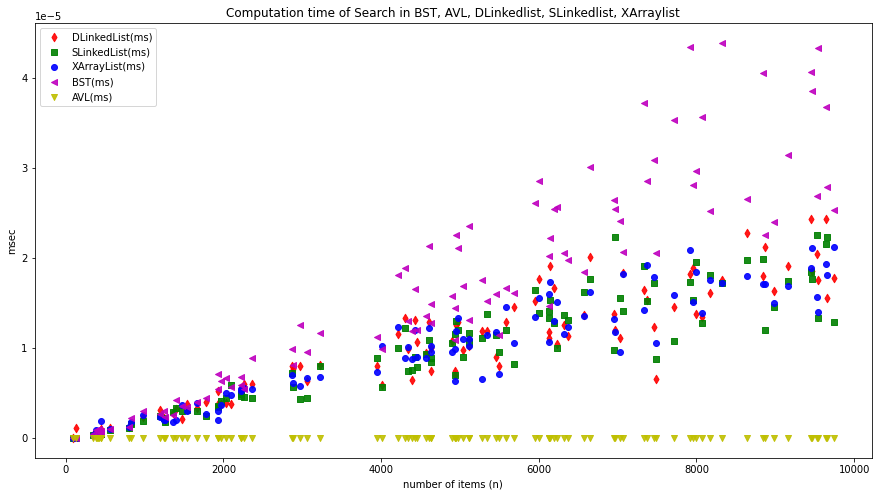

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

alisttime = pd.read_csv('search.csv')
#print(alisttime.iloc[0:3])

alisttime = alisttime.to_numpy()

fig = plt.figure(figsize=(15, 8))
plt.scatter(alisttime[:, 0],  alisttime[:,1], c='r', marker='d', alpha=0.9, label='DLinkedList(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,2], c='g', marker='s', alpha=0.9, label='SLinkedList(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,3], c='b', marker='o', alpha=0.9, label='XArrayList(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,4], c='m', marker='<', alpha=0.9, label='BST(ms)')
plt.scatter(alisttime[:, 0],  alisttime[:,5], c='y', marker='v', alpha=0.9, label='AVL(ms)')
plt.legend()
plt.title('Computation time of Search in BST, AVL, DLinkedlist, SLinkedlist, XArraylist')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
fig.savefig('Search.jpeg')
plt.show()